<a href="https://colab.research.google.com/github/vanessa-oreza/Challenge-Telecom/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom**

#**Introducción**

En el entorno competitivo actual, la retención de clientes se ha convertido en un aspecto fundamental para la sostenibilidad de las empresas, especialmente en aquellas que ofrecen servicios por suscripción. Comprender las razones por las cuales los usuarios deciden cancelar sus contratos permite anticipar comportamientos de abandono y desarrollar estrategias efectivas para mejorar la fidelización.

En este contexto, resulta relevante el análisis de la evasión de clientes, también conocida como churn. Este término proviene del inglés y, originalmente, hacía referencia al acto de agitar o batir, como en la elaboración de mantequilla (churning butter). Aplicado al ámbito empresarial, hace alusión al flujo constante de clientes que ingresan y abandonan una compañía. Así, la churn rate representa el porcentaje de clientes que se dan de baja en un período determinado.

El objetivo de este análisis es identificar los factores asociados al abandono de clientes, explorando variables demográficas, características del servicio contratado y aspectos relacionados con la facturación. A través de esta exploración, se busca obtener información valiosa que permita predecir comportamientos de cancelación y orientar decisiones estratégicas para reducir la pérdida de usuarios.

La problemática surge a partir de la observación de un número creciente de cancelaciones, lo cual representa un riesgo para la estabilidad económica y operativa de Telecom X. Ante esta situación, se hace necesario un análisis sistemático que permita entender el perfil y comportamiento de los clientes que deciden dejar el servicio.

#**Extracción de datos**

In [ ]:
#Se descarga la biblioteca Pandas para manipulación y análisis de datos
import pandas as pd

In [ ]:
#Se importa el archivo json
datos=pd.read_json('/content/TelecomX_Data.json')

In [ ]:
#Se muestran los datos para observar su presentación inicial
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#**Limpieza y tratamimento de datos**

In [ ]:
#Se imprime un resumen del data frame denominado "datos"
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
#Comprobación de incoherencias en los datos: todos los lee como objects
#Manejo de las inconsistencias: normalizar las columnas 'customer', 'phone', 'internet', 'account'

In [ ]:
datos[['gender','SeniorCitizen','Partner','Dependents','tenure']]=pd.json_normalize(datos['customer'])

In [ ]:
datos

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


In [ ]:
#Se visualizan los datos de PhoneService para identificar las claves de los valores.
datos['phone']

,phone
0,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
1,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
2,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
4,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
...,...
7262,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
7263,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
7264,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
7265,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"


In [ ]:
#Se agregan columnas para las claves que se van a extraer con json_normalize
datos[['PhoneService','MultipleLines']]=pd.json_normalize(datos['phone'])

In [ ]:
#Se visualizan los datos
datos.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [ ]:
#Se eliminan las columnas 'customer' y 'phone'
datos=datos.drop(columns=['customer','phone'])

In [ ]:
#Se comprueba el estado actual del Data Frame
datos.head()

,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [ ]:
#Con ayuda de un json_viewer se identificaron los valores de las claves y se crearon columnas para extraer en ellas sus valores correspondientes
datos[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = pd.json_normalize(datos['internet'])

Json_viewer https://jsonformatter.org/json-viewer
Nota: con una pequeña muestra de 10, se cargaron los datos para no atrofiar el viewer tampoco

In [ ]:
#Se eliminó la columna 'internet'
datos = datos.drop(columns=['internet'])
datos

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,"{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
#Se crearon columnas, se extrayeron datos y se eliminó la columna 'account'
datos[['Contract','PaperlessBilling','PaymentMethod','Charges.Monthly','Charges.Total']] = pd.json_normalize(datos['account'])
datos = datos.drop(columns=['account'])
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
# Reemplazar las cadenas de solo espacio con NaN en la columna 'Charges.Total'
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', pd.NA)

# Convertir la columna 'Charges.Total' a tipo numérico, coaccionando los errores (como NaN)
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')

# Ahora puedes verificar el tipo de datos y realizar operaciones numéricas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Siguiendo la instrucción, se creó una nueva columna con el valor diario de los cargos al consumidor
datos['Charges.daily']=datos['Charges.Monthly']/30

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Estandarización y transformación de datos
#Los Sí y No a 1 y 0

In [ ]:
import numpy as np

In [ ]:
col_estandar=['Partner','Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [ ]:
datos[col_estandar]=datos[col_estandar].apply(lambda x: x.replace('Yes','1').replace('No','0').replace("No internet service", "0").replace("No phone service","0"))

In [ ]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [ ]:
datos[col_estandar]=datos[col_estandar].astype(np.int64)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
1380,1996-DBMUS,No,Female,1,1,0,48,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),70.65,3545.05,2.355000
5151,7028-DVOIQ,Yes,Male,1,0,0,35,1,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,99.05,3395.80,3.301667
6704,9229-RQABD,No,Male,0,0,0,18,1,1,No,...,0,0,0,0,One year,0,Mailed check,23.75,424.50,0.791667
6100,8337-MSSXB,Yes,Female,0,0,0,14,1,0,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,86.30,1180.95,2.876667
6102,8338-QIUNR,No,Male,0,1,1,72,1,1,DSL,...,1,1,0,0,Two year,1,Credit card (automatic),66.50,4811.60,2.216667
2572,3585-YNADK,No,Female,0,1,0,57,1,1,DSL,...,1,1,1,0,One year,0,Bank transfer (automatic),74.60,4368.95,2.486667
5369,7328-ZJAJO,No,Female,0,1,1,59,1,0,No,...,0,0,0,0,Two year,0,Credit card (automatic),19.50,1222.65,0.650000
5986,8182-PNAGI,Yes,Male,0,0,0,12,1,0,DSL,...,0,1,0,0,Month-to-month,0,Bank transfer (automatic),50.25,593.75,1.675000
1168,1663-MHLHE,No,Male,0,0,0,1,1,0,No,...,0,0,0,0,Month-to-month,0,Mailed check,19.20,19.20,0.640000
3502,4827-USJHP,No,Male,0,0,0,20,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,51.80,1023.85,1.726667


#**Análisis exploratorio de datos**

##Estadística descriptiva

In [ ]:
#Se presenta un resumen estadístico de las columnas numéricas
estadistica=datos.describe()
estadistica

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


A partir de las estadísticas descriptivas, se determinó que de un total de 7,267 clientes:
- `SeniorCitizen`: solo el 16% de son adultos mayores. La mayoría no lo es.
- `Partner`: el 48% tienen pareja. Es una división casi equitativa.
- `Dependents`: el 30% tiene dependientes (hijos u otros).
- `tenure`: la media son 32 meses de contrato o 2.7 años.
- `PhoneService`: el 90% contrata servicio telefónico.
- `MultipleLines`: el 42% contrata más de una línea telefónica.
- `OnlineSecurity`: el 28% contrata seguridad en línea.
- `OnlineBackup`: el 34% contrata el respaldo en línea.
- `DeviceProtection`: el 34% contrata la protección del dispositivo.
- `TechSupport`: el 28% contrata soporte técnico.
- `StreamingTV`: el 38% contrata televisión por cable.
- `StreamingMovies`: el 38% contrata la suscripción de streaming de películas
- `PaperlessBilling`: el 59% prefiere recibir la factura en línea.

- `Charges.daily`: el promedio del gasto diario del cliente en promedio es de 2.15 USD.
- `Charges.Monthly`: el promedio del total de todos los servicios del cliente por mes es de 64.72 USD.
- `Charges.Total`: el promedio del total gastado por el cliente al año es de 2280.63 USD.

In [ ]:
#Se exporta el resumen de estadística descriptiva
estadistica.to_csv('resumen-estadistico')

##Gráficos sobre la evasión

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

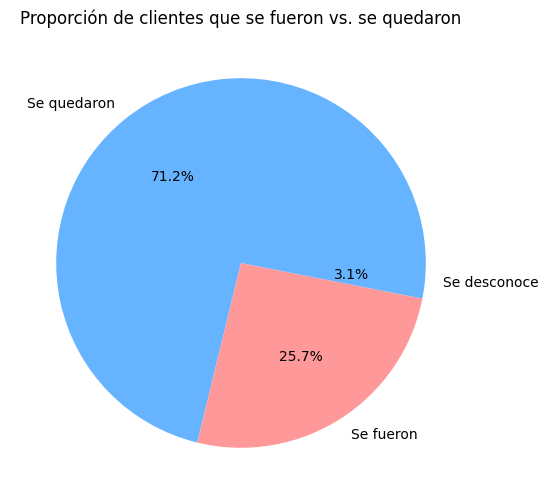

In [ ]:
# Conteo de clientes por categoría de churn
churn_counts = datos['Churn'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Se quedaron","Se fueron","Se desconoce"], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Proporción de clientes que se fueron vs. se quedaron")
plt.show()

Análisis del gráfico de pastel:
El 25.7% de los clientes se fueron. Esto representa un cuarto de los clientes, lo cual es un problema para el bienestar de la compañía. Por esto, es clave identificar los motivos de su salida.

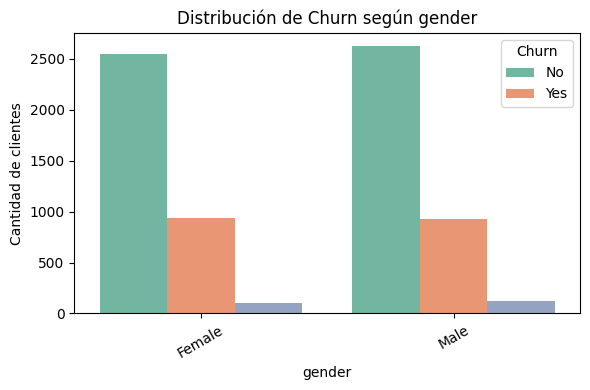

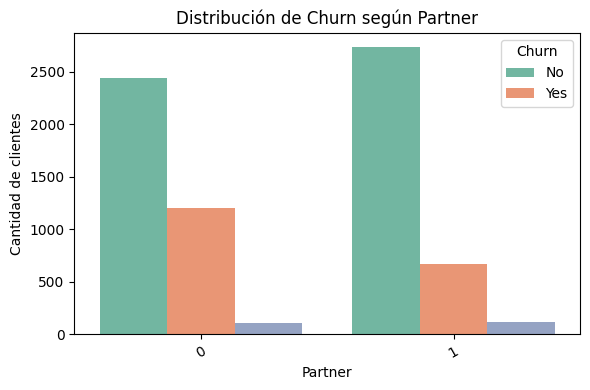

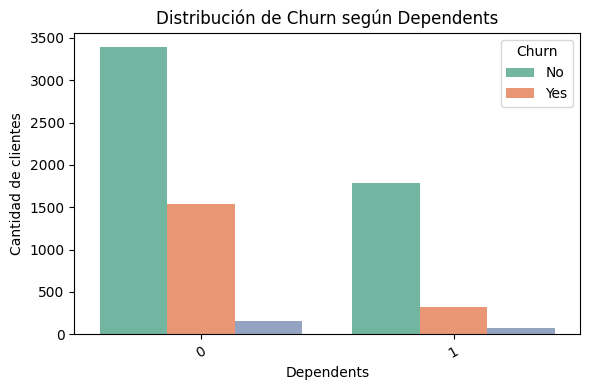

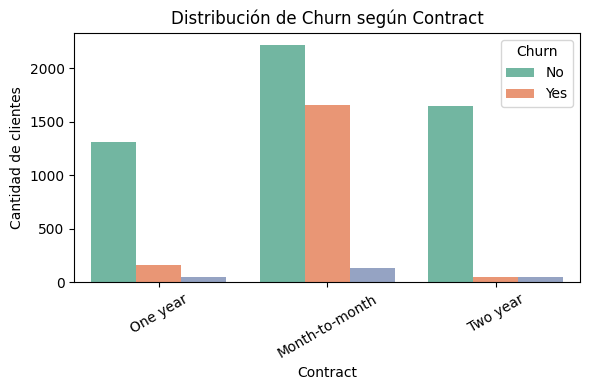

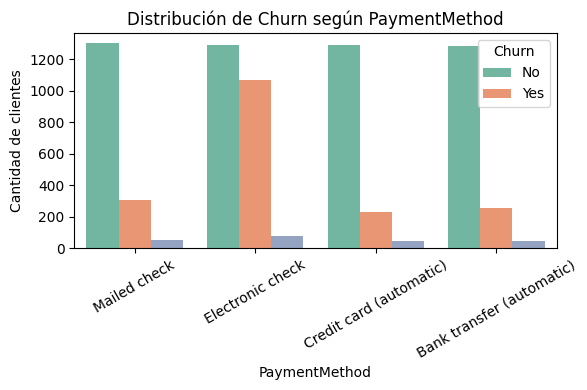

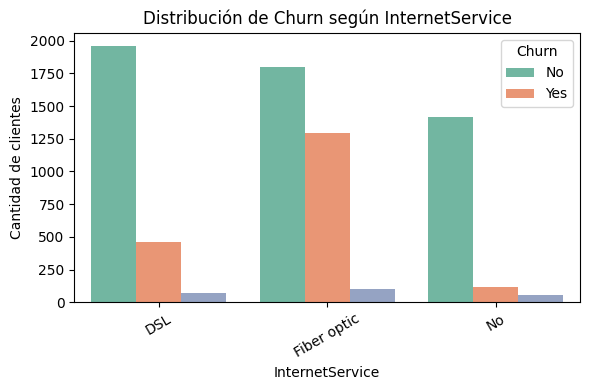

In [ ]:
# Lista de variables categóricas a analizar
categoricas = ['gender', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService']

# Crear un gráfico por cada variable
for col in categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=datos, x=col, hue='Churn', palette='Set2')
    plt.title(f"Distribución de Churn según {col}")
    plt.xticks(rotation=30)
    plt.xlabel(col)
    plt.ylabel("Cantidad de clientes")
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

Análisis de las gráficas de barras:

Según gender o género, no hay diferencia.

Según si tiene partner (1) o no (0), están similares, pero se fueron más lo que no tienen pareja.

Según si tienen depedientes, se fueron más las personas que no tienen dependientes.

Según el tipo de contrato, se fueron más aquellos que están pagando mes con mes.

Según paymentMethod se fueron más los que pagan con cheque electrónico.

Según el internetService se fueron más lo de Fibra Óptica.

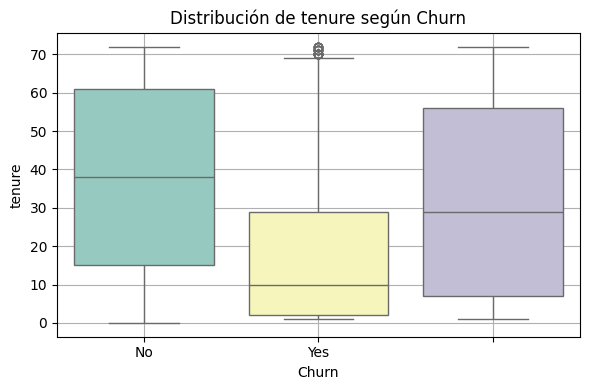

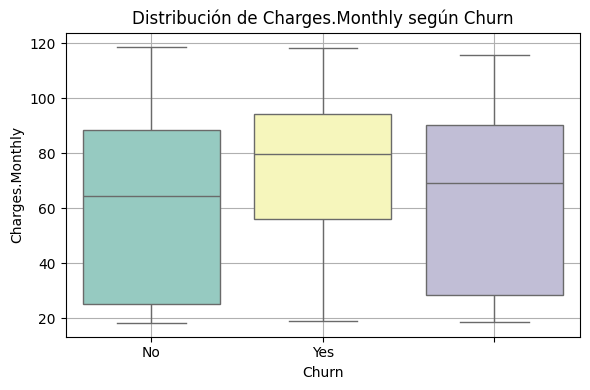

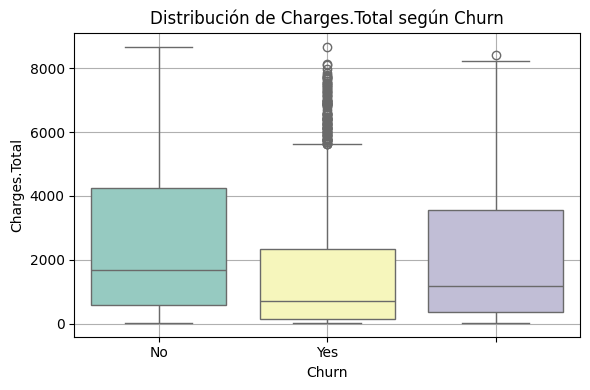

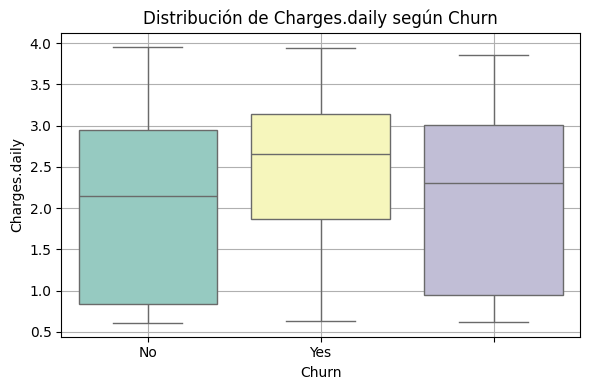

In [ ]:
# Lista de columnas numéricas a explorar
numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.daily']

# Gráficos de distribución para cada variable
for col in numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=datos, x='Churn', y=col, hue='Churn', palette='Set3')
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.tight_layout()
    plt.grid()
    plt.show()

Análisis de boxplot:

Tenure (meses de contrato) según Churn(la evasión de la suscripción): de las personas que cancelaron la suscripción se tiene que...

mínimo: 1 mes de contrato

máximo: 29 meses de contrato

primer cuartil de los clientes (25%) - el primer extremo del rectángulo: 2 meses de contrato

segundo cuartil de los clientes (50%) - la linea es la mediana: 10 meses de contrato

tercer cuartil de los clientes (75%) - el extremo superior del rectágulo: 29 meses de contrato

Análisis de boxplot:

Cargo mensual según churn (evasión de la suscripción): de las personas que cancelaron la suscripción se tiene que...

mínimo: 20 USD

máximo: 118 USD

primer cuartil de los clientes (25%) - el primer extremo del rectángulo: 55 USD

segundo cuartil de los clientes (50%) - la linea es la mediana: 80 USD

tercer cuartil de los clientes (75%) - el extremo superior del rectágulo: 95 USD

Análisis de boxplot:

Cargo diario según churn (evasión de la suscripción): de las personas que cancelaron la suscripción se tiene que...

mínimo: 0.7 USD

máximo: 3.8 USD

primer cuartil de los clientes (25%) - el primer extremo del rectángulo: 1.8 USD

segundo cuartil de los clientes (50%) - la linea es la mediana: 2.7 USD

tercer cuartil de los clientes (75%) - el extremo superior del rectágulo: 3.2 USD

Análisis del boxplot:
Se observa que las personas que cancelaron la suscripción tenían tarifas más caras lo que pudo ser un factor para que tuvieran un tiempo reducido de contrato.

#**Conclusiones e Insights**

Es preocupante que el 25% de los clientes canceló su contrato. Los clientes nuevos que llegan no deciden quedarse en la empresa Telecom X. Algunos de los factores que podrían estar influyendo en la cancelación de las suscripciones son:


*   Las personas que tienen dependientes no cancelaron tanto, es posible que sus hijos utilicen los servicios y por ellos continúen contratando.
*   El precio está afectando ya que las personas que cancelaron la suscripción tenían tarifas más caras lo que pudo ser un factor para que tuvieran un tiempo reducido de contrato.




#**Recomendaciones**

A partir del análisis realizado, se identifican patrones de comportamiento en los clientes que han cancelado sus servicios. En base a estos hallazgos, se proponen las siguientes recomendaciones estratégicas para mejorar la retención:

1. Mejorar la experiencia del cliente durante el primer mes

Dado que muchos clientes nuevos cancelan, es fundamental enfocarse en ese período inicial. Acciones como ofrecer beneficios promocionales durante el primer mes y realizar una encuesta temprana de satisfacción para detectar problemas a tiempo podrían ser muy útiles para atraer clientes y platear estrategias futuras.

2. Revisar las tarifas

El análisis muestra que los clientes que cancelaron suelen tener cargos mensuales más altos. Se recomienda ofrecer descuentos asociados a la permanencia como una forma de incentivar la continuidad del servicio, sin que el usuario perciba una presión directa para comprometerse.

3. Monitorear y ajustar constantemente

Establecer un sistema de monitoreo continuo del comportamiento el cliente en las primeras semanas del contrato, así como del feedback, para ajustar campañas de retención de manera ágil.

#**Notas personales**

Durante el desarrollo de este análisis, identifiqué algunos aspectos que me gustaría mejorar en futuras actividades. Por ejemplo, recuerdo que era posible automatizar ciertos procesos utilizando ciclos, pero en esta ocasión no supe aplicarlos correctamente, lo que me llevó a resolver algunas tareas de forma más manual.

También me hubiera gustado explorar el uso de herramientas de visualización como Plotly, ya que podrían haber aportado gráficos más interactivos y dinámicos, aunque en esta etapa no estuve segura de cómo implementarlos adecuadamente.

Otro punto que me generó dudas fue cómo interpretar los valores vacíos en la variable Churn. En algunos registros faltaba esta información y no supe con certeza si debía considerarlos como clientes que permanecieron o como cancelaciones.

Reconozco estos puntos como oportunidades de mejora, y me interesa seguir aprendiendo para resolverlos con más confianza en el futuro.